# Proyek Data Science 1

*   Name: Muhammad Fadhil Abidin
*   Email: abidinfadhil@gmail.com
* Dicoding Id: mufiiin

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cleansing Data:

In [ ]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Attrition    412
dtype: int64

# Exploratory Data Analyst:

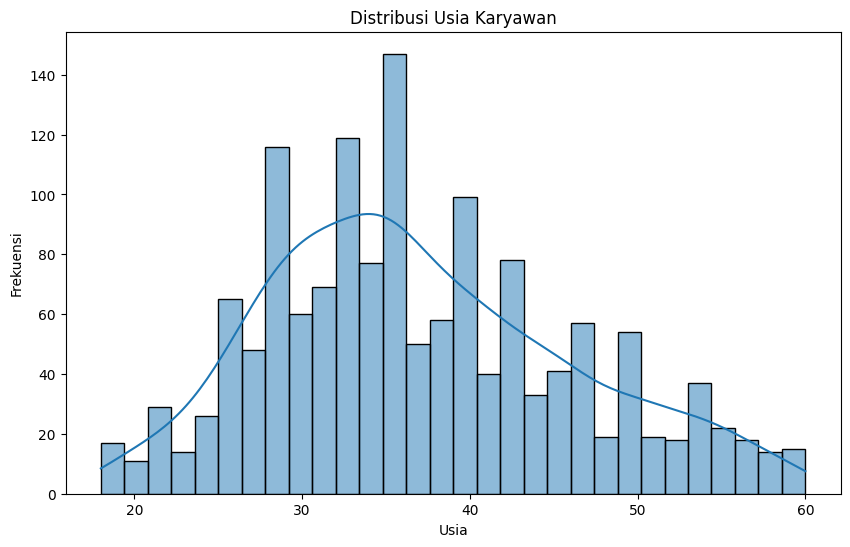

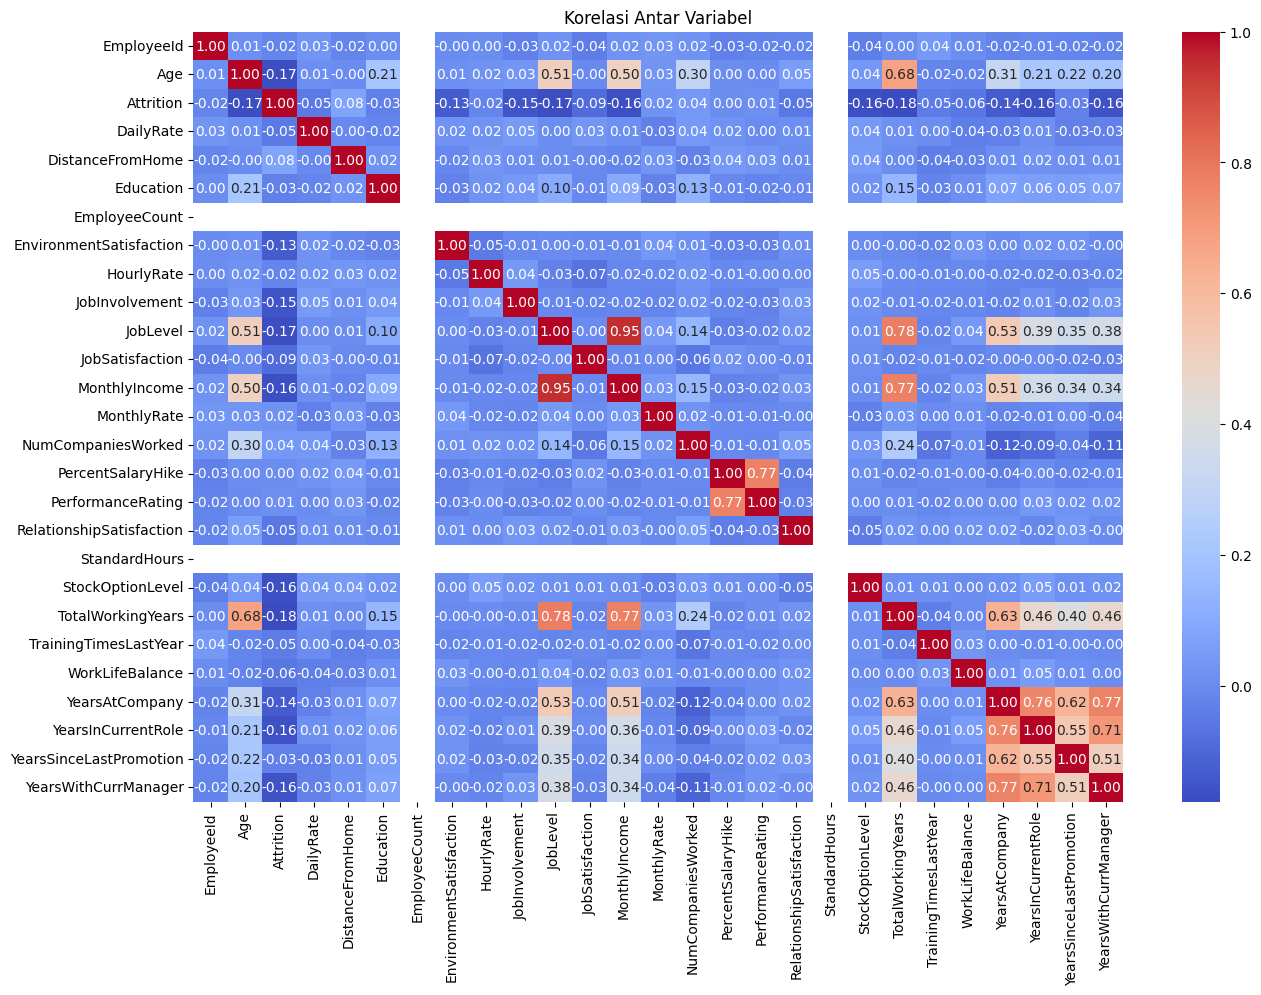

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Usia Karyawan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

# Modeling:

In [ ]:
from sklearn.model_selection import train_test_split

X = numeric_df.drop(columns=['Attrition', 'EmployeeId'])
y = numeric_df['Attrition'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# EVALUASI:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[260   2]
 [ 29   3]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       262
         1.0       0.60      0.09      0.16        32

    accuracy                           0.89       294
   macro avg       0.75      0.54      0.55       294
weighted avg       0.87      0.89      0.86       294



# Membuat Perbandingan:

In [ ]:
df['Attrition'].fillna(0, inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
employee_data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

X = employee_data_encoded.drop(columns=['Attrition', 'EmployeeId'])
y = employee_data_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1097,29,1247,20,2,1,4,45,3,2,4,...,False,False,False,False,False,True,False,False,False,False
727,29,1210,2,3,1,1,78,2,2,2,...,False,False,False,False,False,True,False,True,False,False
254,32,1109,29,4,1,4,69,3,1,3,...,True,False,False,False,False,False,False,False,True,False
1175,38,1084,29,3,1,4,54,3,2,4,...,False,False,True,False,False,False,False,True,False,False
1341,38,693,7,3,1,4,57,4,1,3,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
X = employee_data_encoded.drop(columns=['Attrition', 'EmployeeId'])
y = employee_data_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1097,29,1247,20,2,1,4,45,3,2,4,...,False,False,False,False,False,True,False,False,False,False
727,29,1210,2,3,1,1,78,2,2,2,...,False,False,False,False,False,True,False,True,False,False
254,32,1109,29,4,1,4,69,3,1,3,...,True,False,False,False,False,False,False,False,True,False
1175,38,1084,29,3,1,4,54,3,2,4,...,False,False,True,False,False,False,False,True,False,False
1341,38,693,7,3,1,4,57,4,1,3,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = employee_data_encoded.drop(columns=['Attrition', 'EmployeeId'])
y = employee_data_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(conf_matrix)
print(class_report)


[[259   3]
 [ 31   1]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       262
         1.0       0.25      0.03      0.06        32

    accuracy                           0.88       294
   macro avg       0.57      0.51      0.50       294
weighted avg       0.82      0.88      0.84       294

